## **Statistical analysis and ML prediction of player value**

The used in this project was downloaded from kaggle,https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv 
and collected from the game FIFA 23 https://www.ea.com/games/fifa/fifa-23. 
Which is a well respected and established football game, that many rely on for doing statistical analysis on football players.  
It consists of statistics about more than 18000 players with 89 columns for each, ranging from descriptive statistics (metadata) such as name, age, nationality; to more predictive statistics such as a players overall rating and potential.
The data types in the columns include, nominal data, such as what club and what position they play at, numerical data, such as their overall rating. 
However, their is no continous data present, which may seem odd, but keep in mind that the overall rating and potential of a player is carefully constructed values from all types of continous data from the games they have played.
The input data, x-values, in the analysis will be a subset of all the columns present in the dataset. 
This subset will consists of parameters that I see fit and are most relevant for the analysis to achieve a good result. 
There will be a careful consideration of what parameter are relevant and not.

The target value, is a score for each player representing their market value. A players market value is an intrinsically subjective value. There is no de-facto value of a player, only estimates, until the player is bought by another club; and the purchase of a player is not an independent price and doesn't have to fully represent the player's market value, it could be subject to several different factors leading to the price being higher or lower than what it could've been. 

In [1]:
# Importing libraries and downloading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
pd.set_option('display.max_columns', None)

data = pd.read_csv('FIFA_23_Players_Data.csv')
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [2]:
# Dropping the columns that are not needed
data.drop(columns=['Image Link', 'On Loan', 'National Team Image Link'], inplace=True)
data.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,Left,4,4,5,Argentina,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,Right,4,4,4,France,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,Right,4,4,5,Poland,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,Right,5,4,4,Belgium,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,Right,4,5,4,France,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


#### **Q-Q plot of the relation between the training data and the validation data**  
The three paramaters chosen for the plot:
* Age 
* Potential
* Market Value

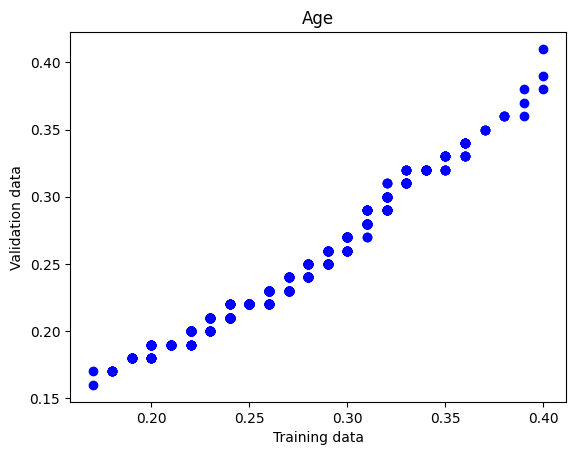

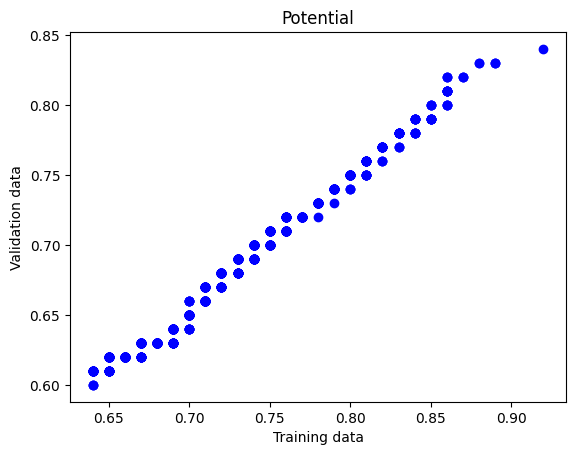

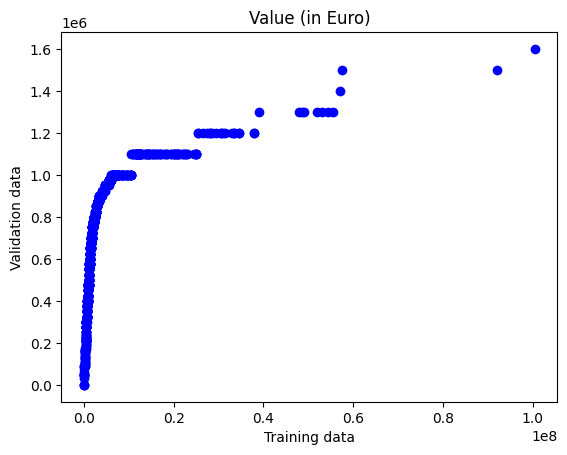

In [4]:
# TODO: should be refined
from random import sample
# Splitting the data into training and test data
split_point = int(0.80*len(data))
train_data = data[:split_point]
test_data = data[split_point:]

# Further splitting the training data into training and validation data, for qq-plot
split_point = int(0.80*len(train_data))
qq_train = train_data[:split_point]
qq_validation = train_data[split_point:]

def qq_plot(d1, d2, title: str, sample_size: int, norm=False):
    if norm:
        x = sample(list(map(lambda x: x * 0.01, d1)), sample_size)
        y = sample(list(map(lambda x: x * 0.01, d2)), sample_size)
    else:
        x = sample(d1, sample_size)
        y = sample(d2, sample_size)
    fig, ax = plt.subplots()
    ax.scatter(np.sort(x), np.sort(y), color='blue')
    ax.set_xlabel('Training data')
    ax.set_ylabel('Validation data')
    ax.set_title(title)

qq_plot(list(qq_train['Age']), list(qq_validation['Age']), 'Age', 1000, norm=True)
qq_plot(list(qq_train['Potential']), list(qq_validation['Potential']), 'Potential', 1000, norm=True)
qq_plot(list(qq_train['Value(in Euro)']), list(qq_validation['Value(in Euro)']), 'Value (in Euro)', 1000)

### **Problem statement**  
The goal of this project is to create two models that predict, from the given data, a football players market value. The result will be compared to established market value predictors and the comparison will act as an evaluation of how good the models are. Futhermore, there will be a careful statistical analysis of the data, in general and more specifically how it's used in the models, what parameters are of interest and how that can and will impact the results.  

The market value of players are of intereset for several reasons.
Mainly to put a label on a given player, the worth of a player, in an economical sense. 
Football is a sport as well as a business. 
In order to compete a club must develop and aquire new players. 
Statistical analysis have been a huge part of sports for many years now and carefully developed models can give a club a big edge over others, by for instance, finding and aquireing players below their *actual* market value, the process of what some could call "finding hidden gems".

### **Descriptive analysis**  
To give some more intuition and insight into the dataset, the histograms of some select variables will be shown.  

**Variables**
* Age
* Height in centimeters
* Weight in kilograms
* Pace total (acceleration + sprint speed)
* Shooting total (Positioning, Finishing, Shot Power, Long Shots, Volleys, Penalties)

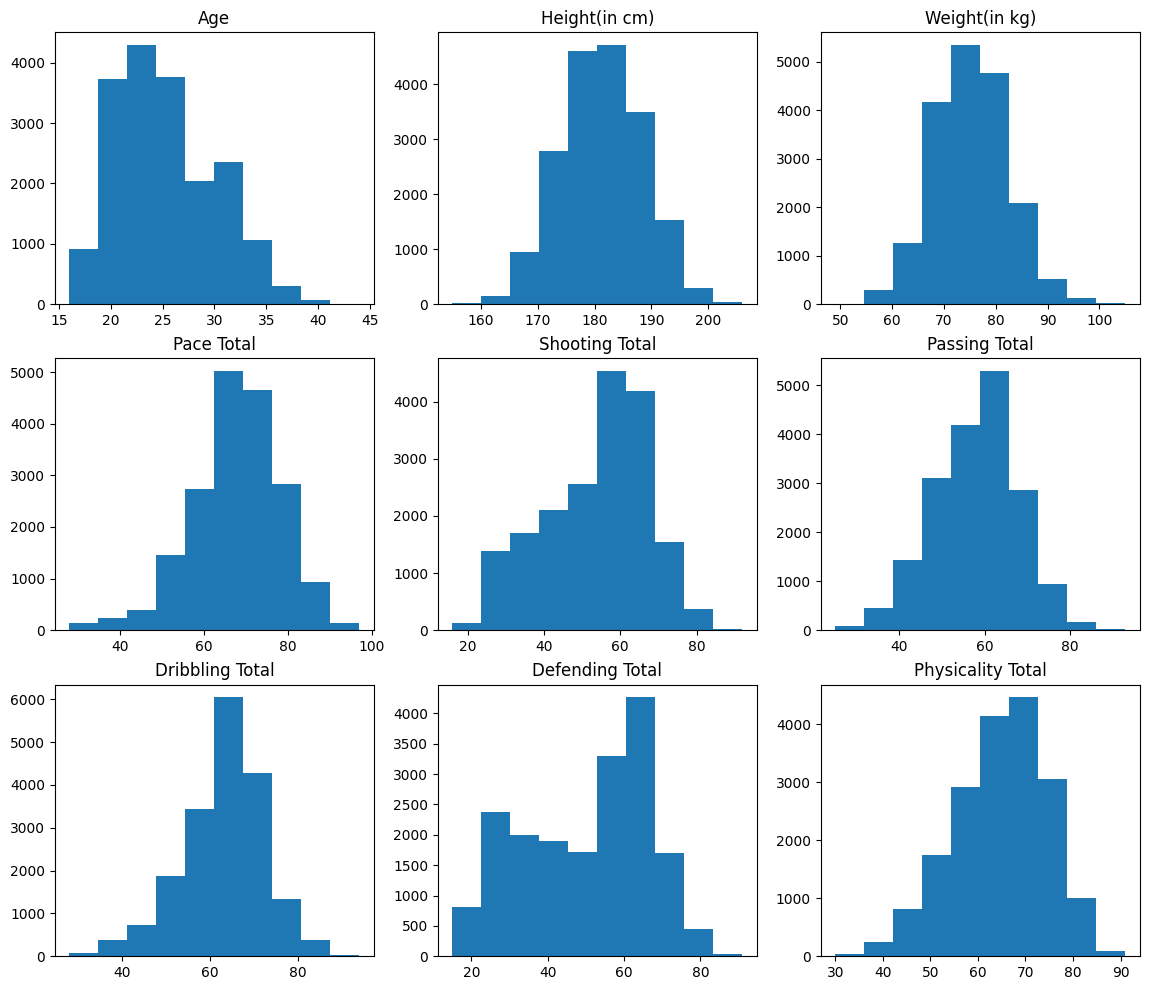

In [21]:
def plot_histograms(labels, data):
    fig, axes = plt.subplots(int(len(labels) / 3), 3, figsize=(14, 12))
    row = 0
    for i in range(len(labels)):
        if i != 0 and i % 3 == 0:
            row += 1
        axes[row, (i % 3)].set_title(labels[i])
        axes[row, (i % 3)].hist(data[labels[i]])

labels = ['Age', 'Height(in cm)', 'Weight(in kg)', 'Pace Total', 'Shooting Total', 
'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']

plot_histograms(labels, data)

### **Probability distribution**

### **Predictive analysis**

### **Conclusion**